# Predicting number of stars from text (classification)

In [52]:
import pickle
from train_test_split import get_training_portion_of_the_data, train_test_split_as_requested
from model_evaluation import draw_word_cloud, test_different_models, metrics_classification, print_scoretable, draw_confusion_matrix_for_good_poor, createGraphsFromScores, get_metrics_for_algorithm, add_or_replace_to_datafrema

import matplotlib.pyplot as plt

import numpy as np

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.decomposition import PCA

CATEGORY_COLUMN_NAME = "category"
RANDOM_STATE = 42


## Getting data from pickle files dumped in notebook 1

In [4]:
with open("random_reviews.p","rb") as f:
    random_reviews = pickle.load( f )

with open("bow1000.p","rb") as f:
    bow1000 = pickle.load( f )

In [6]:
random_reviews_staranalysis = get_training_portion_of_the_data(random_reviews)
bow1000_staranalysis = get_training_portion_of_the_data(bow1000) 

returns 800 lines in total 1000 out of lines (portion 0.8)
returns 800 lines in total 1000 out of lines (portion 0.8)


## Testit

### Generate a “wordcloud" plot for 100 most frequent words of the selected 

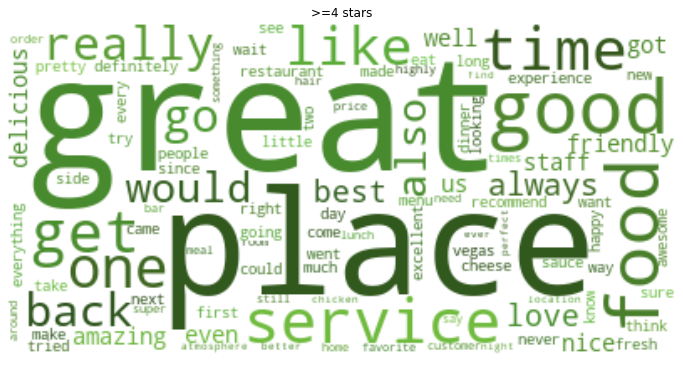

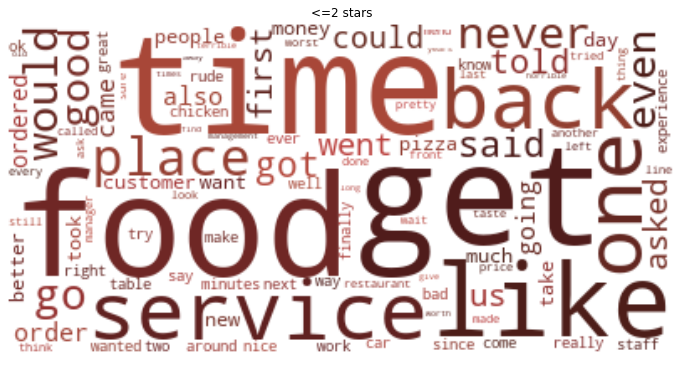

In [8]:
draw_word_cloud(bow1000_staranalysis.loc[random_reviews_staranalysis['stars'] >= 4], ">=4 stars", color="green")
draw_word_cloud(bow1000_staranalysis.loc[random_reviews_staranalysis['stars'] <= 2], "<=2 stars", color="red")

## Testind binary classification methods of scikit-learn
Predict the label (good or poor) of a review based on the review text

In [10]:
random_reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,category
0,KW5edXlPGeZ0cx7MiJyamw,0,2017-03-07 02:03:24,0,nkvJghZnOkZy4HAo87ouSA,5,"A stellar cafe!!! Very classy, warm & inviting...",0,PH2Ly-LUDc5i-eW_97MlNw,1
1,oxwGyA17NL6c5t1Etg5WgQ,0,2017-04-13 04:03:48,0,7KrKzKgUdflicfUs_bWNUQ,1,"Can you say ""Bait and Switch?"" A couple of da...",1,EnSUGj7a7FocW3blBj_hEw,0
2,bKxKPGmkwH-Q-GSbt7chNA,1,2013-08-11 20:05:49,1,f54iEgnNZEE-JPcdVuNXSQ,2,"When first walking in to Stingray Sushi, a low...",3,aY4FqMsNXBirS72lM_CdwQ,0
3,q5viyMO6EtJMmmarb4YmIA,0,2015-01-09 23:57:08,0,AtKH9dzGHIKoyAhOLcVUIw,4,A very beautiful restaurant in the Hardrock ca...,2,CTaZ3ebFGQMHaLZhnO2EuA,1
4,BS7PU7REvJZ7hVSHA6z8wQ,0,2017-09-03 22:40:45,0,C5vaxaN3IZvmBpvcv0uYXw,2,I've been here twice. The first time was a pre...,1,Kya8CWymuq437rxhHyiM2g,0


### Testataan erilaisia algoritmeja good-poor -categorian ennustamiseen

In [12]:
X = np.array(bow1000)
y = np.array(random_reviews[CATEGORY_COLUMN_NAME])

X_train, X_test, y_train, y_test = train_test_split_as_requested(X, y)
# print("X_train.shape: {}, y_train.shape: {}".format(X_train.shape, y_train.shape))

modelsToTest=[
  ("LogisticRegression", sklearn.linear_model.LogisticRegression(solver='lbfgs', random_state=RANDOM_STATE, max_iter=1000)), #, multi_class='multinomial'
  ("LinearRegression", sklearn.linear_model.LinearRegression(normalize=True, fit_intercept=True), 0.5),
  ("Ridge", sklearn.linear_model.Ridge(alpha=.5, fit_intercept=False), 0.5),
  ("Perceptron", sklearn.linear_model.Perceptron()),
  ("KNeighborsClassifier", KNeighborsClassifier(n_neighbors=2,n_jobs=10,leaf_size=40, algorithm ="brute")),
  ("GaussianProcessClassifier", GaussianProcessClassifier(1.0 * RBF(1.0))),
  ("DecisionTreeClassifier", DecisionTreeClassifier(max_depth=5)),
  ("MLPClassifier", MLPClassifier(alpha=1, max_iter=1000)),
  ("AdaBoostClassifier", AdaBoostClassifier()),
  ("QuadraticDiscriminantAnalysis", QuadraticDiscriminantAnalysis()),
  ("SVC", SVC(gamma='auto')),
  ("RandomForestClassifier",RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))
]
predictionTable = test_different_models(X_train, X_test, y_train, y_test, modelsToTest)

N/A% (0 of 12) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--Returns X_train, X_test, y_train, y_test
 66% (8 of 12) |################         | Elapsed Time: 0:00:16 ETA:   0:00:06C:\Users\MattiH\.conda\envs\DS_project\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\MattiH\.conda\envs\DS_project\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
100% (12 of 12) |########################| Elapsed Time: 0:00:17 Time:  0:00:17


In [38]:
scores = metrics_classification(predictionTable)
scores = scores.sort_values(by=['Accuracy'], ascending=False)
print_scoretable(scores)

Model,Accuracy,AUC,MCC,Precision,Recall
MLPClassifier,0.81,0.79,0.59,0.85,0.87
RandomForestClassifier,0.81,0.79,0.59,0.84,0.88
LogisticRegression,0.81,0.77,0.56,0.83,0.88
GaussianProcessClassifier,0.81,0.76,0.56,0.82,0.9
Perceptron,0.8,0.78,0.55,0.85,0.83
AdaBoostClassifier,0.77,0.73,0.48,0.8,0.86
DecisionTreeClassifier,0.71,0.6,0.31,0.7,0.96
Ridge,0.67,0.67,0.32,0.79,0.68
SVC,0.67,0.53,0.19,0.66,1
LinearRegression,0.66,0.63,0.26,0.74,0.73


In [ ]:
modelsToTest[:1][0][0]

c:\Users\MattiH\OneDrive - Aalto University\Data science\Final project\Data Science - Final project\To git\CS-C3160_DS_course_project\model_evaluation.py:51: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


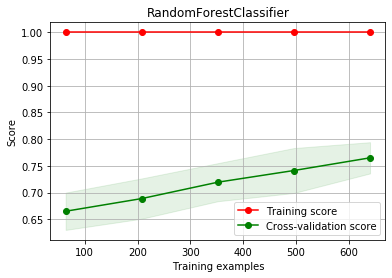

100% (1 of 1) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
C:\Users\MattiH\.conda\envs\DS_project\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


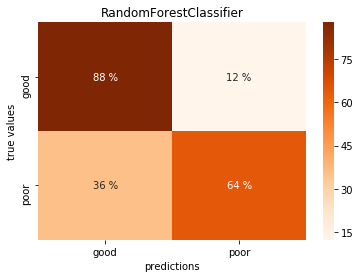

In [40]:
predictionTable_temp = test_different_models(X_train, X_test, y_train, y_test, modelsToTest[11:12], show_learning_curve=True)
draw_confusion_matrix_for_good_poor(y_test.flatten(), predictionTable_temp[modelsToTest[11:12][0][0]], title=modelsToTest[11:12][0][0])

# draw_confusion_matrix_for_good_poor(y_test.flatten(), predictionTable["LogisticRegression"], title="LogisticRegression")
# draw_confusion_matrix_for_good_poor(y_test.flatten(), predictionTable["GaussianProcessClassifier"], title="GaussianProcessClassifier")
# draw_confusion_matrix_for_good_poor(y_test.flatten(), predictionTable["MLPClassifier"], title="MLPClassifier")
# draw_confusion_matrix_for_good_poor(y_test.flatten(), predictionTable["RandomForestClassifier"], title="RandomForestClassifier")
# draw_confusion_matrix_for_good_poor(y_test.flatten(), predictionTable["KNeighborsClassifier"], title="KNeighborsClassifier")

### samat testit PCA:n jälkeen

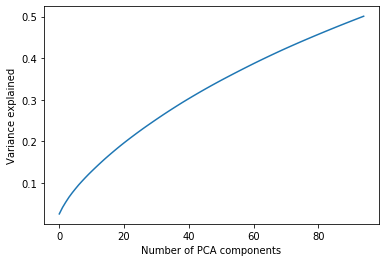

100% (12 of 12) |########################| Elapsed Time: 0:00:04 Time:  0:00:04
C:\Users\MattiH\.conda\envs\DS_project\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\MattiH\.conda\envs\DS_project\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\MattiH\.conda\envs\DS_project\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Model,Accuracy,AUC,MCC,Precision,Recall
MLPClassifier,0.79,0.76,0.53,0.82,0.87
LogisticRegression,0.77,0.72,0.47,0.79,0.86
LinearRegression,0.75,0.66,0.43,0.74,0.96
RandomForestClassifier,0.75,0.67,0.42,0.75,0.93
SVC,0.72,0.63,0.35,0.72,0.95
Perceptron,0.71,0.67,0.35,0.76,0.83
QuadraticDiscriminantAnalysis,0.71,0.64,0.33,0.73,0.88
KNeighborsClassifier,0.69,0.68,0.35,0.79,0.71
AdaBoostClassifier,0.69,0.62,0.27,0.72,0.85
GaussianProcessClassifier,0.65,0.5,0,0.65,1


In [49]:
# import warnings
# warnings.filterwarnings(action='once')

y_train, y_test = y_train.reshape(-1,1), y_test.reshape(-1,1)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Scaling data
scaler_X, scaler_y = StandardScaler(), StandardScaler()
scaler_X.fit(X_train), scaler_y.fit(y_train)
X_train_scaled, y_train_scaled = scaler_X.transform(X_train), scaler_y.transform(y_train)
X_test_scaled, y_test_scaled = scaler_X.transform(X_test), scaler_y.transform(y_test)

pca = PCA(0.5)
pca.fit(X_train_scaled)

# Plotting how large part of variance explained
explained = pca.explained_variance_ratio_.cumsum()

plt.plot(np.arange(len(explained)),explained)
plt.ylabel("Variance explained")
plt.xlabel("Number of PCA components")
plt.show()

X_train_pca, X_test_pca = pca.transform(X_train_scaled), pca.transform(X_test_scaled)
X_train_pca = np.array(X_train_pca)
X_test_pca = np.array(X_test_pca)

predictionTable = test_different_models(X_train_pca, X_test_pca, y_train.flatten(), y_test.flatten(), modelsToTest)
scoresPCA = metrics_classification(predictionTable)
scoresPCA = scoresPCA.sort_values(by=['Accuracy'], ascending=False)
print_scoretable(scoresPCA)

## All rated "good"

In [53]:
newSeries = get_metrics_for_algorithm("-- All reviews graded good --", np.ones(len(y_test)) , y_test)
scores = add_or_replace_to_datafrema(newSeries.Model, scores, newSeries)
scores = scores.sort_values(by=['Accuracy'], ascending=False)
# print_scoretable(scores)

C:\Users\MattiH\.conda\envs\DS_project\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


NameError: name 'add_or_replace_to_datafrema' is not defined

In [ ]:
draw_confusion_matrix_for_good_poor(y_test.flatten(),np.ones(len(y_test)), title="All reviews graded good")

## Random guess

In [28]:
randomchoises = np.random.choice(a=[False, True], size=len(y_test))
newSeries = get_metrics_for_algorithm("-- Random guess --", randomchoises, y_test)
scores = add_or_replace_to_datafrema(newSeries.Model, scores, newSeries)
scores = scores.sort_values(by=['Accuracy'], ascending=False)

NameError: name 'get_metrics_for_algorithm' is not defined

In [ ]:
draw_confusion_matrix_for_good_poor(y_test.flatten(), randomchoises, title="Random guess")

## Kaikki tulokset taulukkona ja kuvana

In [32]:
print_scoretable(scores)

NameError: name 'print_scoretable' is not defined

In [35]:
createGraphsFromScores(scores)

NameError: name 'createGraphsFromScores' is not defined

In [36]:
def color_negative_red(val):
    color = 'red' if val < 0.5 else 'green'
    return 'color: %s' % color
#predictionTable.T
#predictionTable.T.style.applymap(color_negative_red)
predictionTable.T.style.apply(lambda x: ["background: lightgreen" if v == x.iloc[0] else "" for v in x], axis = 0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
